In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/train.csv", index_col="PassengerId")
df.drop(columns=["Name", "Cabin", "Ticket"], inplace=True)

### Target

In [3]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Numeric vs. Target 

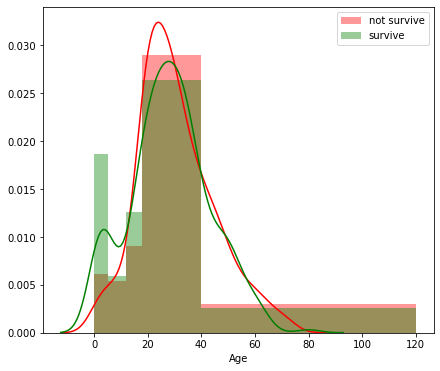

In [5]:
plt.figure(figsize=(7, 6))
sns.distplot(df["Age"][df["Survived"] == 0], bins=[0, 5, 12, 18, 40, 120], color='r', label="not survive")
sns.distplot(df["Age"][df["Survived"] == 1], bins=[0, 5, 12, 18, 40, 120], color='g', label="survive")
plt.legend();

**Temuan** : Awak kapal berusia dewasa, cenderung tidak selamat. Justru terlihat secara signifikan bahwa awak kapal yang masih anak-anak cenderung selamat.

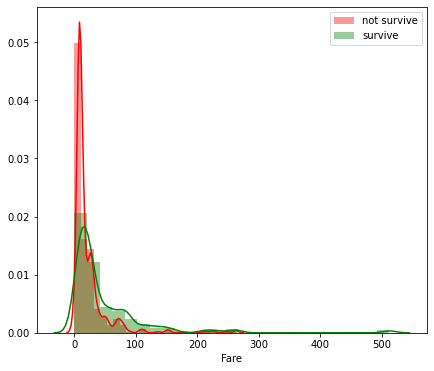

In [6]:
plt.figure(figsize=(7, 6))
sns.distplot(df["Fare"][df["Survived"] == 0], bins=25, color='r', label="not survive")
sns.distplot(df["Fare"][df["Survived"] == 1], bins=25, color='g', label="survive")
plt.legend();

**Temuan** : Terlihat bahwa awak kapal dengan tiket murah cenderung tidak selamat.

### Categorical / Ordinal vs. Target

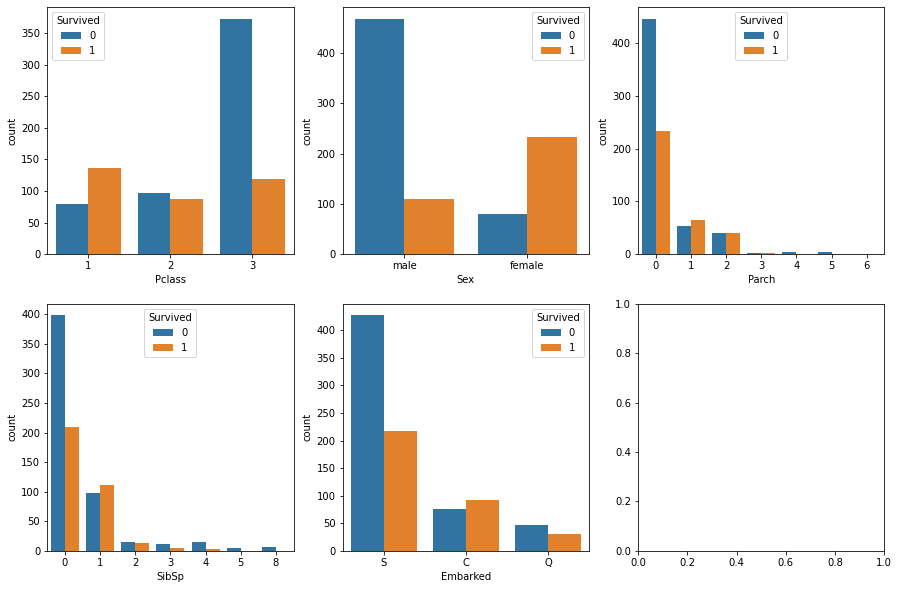

In [9]:
categorical_columns = ["Pclass", "Sex", "Parch", "SibSp", "Embarked"]
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for c, a in zip(categorical_columns, ax.flatten()):
    sns.countplot(c, data=df, hue="Survived", ax=a)

**Temuan** :
- Awak dengan kelas sosial level 3 (lower), cenderung tidak selamat
- Awak kapal yang berjenis kelamin laki-laki cenderung tidak selamat
- Awak kapal yang berada di kapal tanpa membawa keluarga dan pasangan, cenderung tidak selamat
- Awak kapal yang berasal dari kota Southampton, cenderung tidak selamat (change tidak selamat lebih besar hampir 2 kali lipat dari yang selamat)

### Crosstab (Optional) 

In [12]:
pd.crosstab(df["Pclass"], df["Survived"], normalize="index")

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


### **Improve Strategy**

- Ada baiknya untuk menambahkan 1 column untuk mengetahui apakah awak kapal tersebut sendirian atau membawa pasangan/keluarganya di kapalnya tersebut
- Age dan Fare menjadi lebih baik dalam memberikan penjelasan terhadap data saat diaplikasikan dengan Binning.

#### **Ingat**, hasil train dari data yang telah melewati Feature Engineering **tidak menjamin** lebih baik daripada hasil dari strategi yang sebelumnya.